Muscle Factor Analysis with Shaul

In [1]:
# Import required libraries
#import pandas as pd
###from sklearn.datasets import load_iris
#from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [2]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

In [3]:
import networkx as nx

flynumbers = list(range(1389,1391))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]
fly = flylist[0]
fly.open_signals()

fly.wb_freq

In [4]:
#fly_nums = range(1556,1565) + range(1566, 1567)#,1545)
#fly_nums = range(1566, 1570)
#multi_fly_df = util.construct_multi_fly_df(fly_nums)
#df = multi_fly_df


fly_nums = range(1389,1402)#,1545)
multi_fly_df = util.construct_multi_fly_df(fly_nums)

Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1394
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [5]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'
 '

In [6]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [32]:
##from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#chi_square_value,p_value=calculate_bartlett_sphericity(df)
#chi_square_value, p_value

In [36]:

filtered_df_turn_left = multi_fly_df.loc[multi_fly_df['amp_diff'] >= 0]

filtered_df_turn_right = multi_fly_df.loc[multi_fly_df['amp_diff'] <= 0]

mean_left_amp = np.mean(multi_fly_df.left_amp)

mean_right_amp = np.mean(multi_fly_df.right_amp)

mean_right_amp_int = int(mean_right_amp)
mean_left_amp_int = int(mean_left_amp)

WSA_increase = multi_fly_df.loc[(multi_fly_df['left_amp'] >= mean_left_amp*1.1) & (multi_fly_df['right_amp'] >= mean_right_amp*1.1)]

WSA_left_turn = multi_fly_df.loc[(multi_fly_df['left_amp'] >= mean_left_amp*1.12) & (multi_fly_df['right_amp'] <= mean_right_amp*.89)]

WSA_right_turn = multi_fly_df.loc[(multi_fly_df['left_amp'] <= mean_left_amp*.95) & (multi_fly_df['right_amp'] >= mean_right_amp*1.25)]

WSA_decrease = multi_fly_df.loc[(multi_fly_df['left_amp'] <= mean_left_amp*.9) & (multi_fly_df['right_amp'] <= mean_right_amp*.9)]

In [23]:
def cov(x):
    r = np.cov(x, rowvar = False, ddof =0)
    return r

In [24]:
def corr(x):
    
    x = (x - x.mean(0))/ x.std(0)
    r = cov(x)
    return r

In [25]:
def calculate_bartlett_sphericity(x):
    n, p = x.shape
    x_corr = corr(x)
    
    corr_det = np.linalg.det(x_corr)
    statistic = -np.log(corr_det) * (n - 1 -(2 * p +5)/6 )
    degrees_of_freedom = p * (p-1)/2
    p_value = chi2.pdf(statistic, degrees_of_freedom)
    return statistic, p_value

In [ ]:
# Create factor analysis object and perform factor analysis
#fa = FactorAnalyzer()
#fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
#ev, v = fa.get_eigenvalues()
#ev

In [37]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape
#(1797, 7)

(1797, 7)

In [38]:
__init__(self, n_components=None, tol=0.01, copy=True, max_iter=1000, noise_variance_init=None, svd_method=’randomized’, iterated_power=3, random_state=0)[source]

SyntaxError: invalid syntax (<ipython-input-38-cc8294d65647>, line 1)

In [42]:
"""Factor Analysis.
A latent linear variable model.
FactorAnalysis is similar to probabilistic PCA implemented by PCA.score
While PCA assumes Gaussian noise with the same variance for each
feature, the FactorAnalysis model assumes different variances for
each of them.
This implementation is based on David Barber's Book,
Bayesian Reasoning and Machine Learning,
http://www.cs.ucl.ac.uk/staff/d.barber/brml,
Algorithm 21.1
"""

# Author: Christian Osendorfer <osendorf@gmail.com>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Denis A. Engemann <denis-alexander.engemann@inria.fr>

# License: BSD3

import warnings
from math import sqrt, log
import numpy as np
from scipy import linalg


from base import BaseEstimator, TransformerMixin
from utils import check_array, check_random_state
from utils.extmath import fast_logdet, randomized_svd, squared_norm
from utils.validation import check_is_fitted
from exceptions import ConvergenceWarning



class FactorAnalysis(BaseEstimator, TransformerMixin):
    """Factor Analysis (FA)
    A simple linear generative model with Gaussian latent variables.
    The observations are assumed to be caused by a linear transformation of
    lower dimensional latent factors and added Gaussian noise.
    Without loss of generality the factors are distributed according to a
    Gaussian with zero mean and unit covariance. The noise is also zero mean
    and has an arbitrary diagonal covariance matrix.
    If we would restrict the model further, by assuming that the Gaussian
    noise is even isotropic (all diagonal entries are the same) we would obtain
    :class:`PPCA`.
    FactorAnalysis performs a maximum likelihood estimate of the so-called
    `loading` matrix, the transformation of the latent variables to the
    observed ones, using expectation-maximization (EM).
    Read more in the :ref:`User Guide <FA>`.
    Parameters
    ----------
    n_components : int | None
        Dimensionality of latent space, the number of components
        of ``X`` that are obtained after ``transform``.
        If None, n_components is set to the number of features.
    tol : float
        Stopping tolerance for EM algorithm.
    copy : bool
        Whether to make a copy of X. If ``False``, the input X gets overwritten
        during fitting.
    max_iter : int
        Maximum number of iterations.
    noise_variance_init : None | array, shape=(n_features,)
        The initial guess of the noise variance for each feature.
        If None, it defaults to np.ones(n_features)
    svd_method : {'lapack', 'randomized'}
        Which SVD method to use. If 'lapack' use standard SVD from
        scipy.linalg, if 'randomized' use fast ``randomized_svd`` function.
        Defaults to 'randomized'. For most applications 'randomized' will
        be sufficiently precise while providing significant speed gains.
        Accuracy can also be improved by setting higher values for
        `iterated_power`. If this is not sufficient, for maximum precision
        you should choose 'lapack'.
    iterated_power : int, optional
        Number of iterations for the power method. 3 by default. Only used
        if ``svd_method`` equals 'randomized'
    random_state : int, RandomState instance or None, optional (default=0)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`. Only used when ``svd_method`` equals 'randomized'.
    Attributes
    ----------
    components_ : array, [n_components, n_features]
        Components with maximum variance.
    loglike_ : list, [n_iterations]
        The log likelihood at each iteration.
    noise_variance_ : array, shape=(n_features,)
        The estimated noise variance for each feature.
    n_iter_ : int
        Number of iterations run.
    Examples
    --------
    >>> from sklearn.datasets import load_digits
    >>> from sklearn.decomposition import FactorAnalysis
    >>> X, _ = load_digits(return_X_y=True)
    >>> transformer = FactorAnalysis(n_components=7, random_state=0)
    >>> X_transformed = transformer.fit_transform(X)
    >>> X_transformed.shape
    (1797, 7)
    References
    ----------
    .. David Barber, Bayesian Reasoning and Machine Learning,
        Algorithm 21.1
    .. Christopher M. Bishop: Pattern Recognition and Machine Learning,
        Chapter 12.2.4
    See also
    --------
    PCA: Principal component analysis is also a latent linear variable model
        which however assumes equal noise variance for each feature.
        This extra assumption makes probabilistic PCA faster as it can be
        computed in closed form.
    FastICA: Independent component analysis, a latent variable model with
        non-Gaussian latent variables.
    """
    def __init__(self, n_components=None, tol=1e-2, copy=True, max_iter=1000,
                 noise_variance_init=None, svd_method='randomized',
                 iterated_power=3, random_state=0):
        self.n_components = n_components
        self.copy = copy
        self.tol = tol
        self.max_iter = max_iter
        if svd_method not in ['lapack', 'randomized']:
            raise ValueError('SVD method %s is not supported. Please consider'
                             ' the documentation' % svd_method)
        self.svd_method = svd_method

        self.noise_variance_init = noise_variance_init
        self.iterated_power = iterated_power
        self.random_state = random_state

    def fit(self, X, y=None):
        """Fit the FactorAnalysis model to X using EM
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : Ignored
        Returns
        -------
        self
        """
        X = check_array(X, copy=self.copy, dtype=np.float64)

        n_samples, n_features = X.shape
        n_components = self.n_components
        if n_components is None:
            n_components = n_features
        self.mean_ = np.mean(X, axis=0)
        X -= self.mean_

        # some constant terms
        nsqrt = sqrt(n_samples)
        llconst = n_features * log(2. * np.pi) + n_components
        var = np.var(X, axis=0)

        if self.noise_variance_init is None:
            psi = np.ones(n_features, dtype=X.dtype)
        else:
            if len(self.noise_variance_init) != n_features:
                raise ValueError("noise_variance_init dimension does not "
                                 "with number of features : %d != %d" %
                                 (len(self.noise_variance_init), n_features))
            psi = np.array(self.noise_variance_init)

        loglike = []
        old_ll = -np.inf
        SMALL = 1e-12

        # we'll modify svd outputs to return unexplained variance
        # to allow for unified computation of loglikelihood
        if self.svd_method == 'lapack':
            def my_svd(X):
                _, s, V = linalg.svd(X, full_matrices=False)
                return (s[:n_components], V[:n_components],
                        squared_norm(s[n_components:]))
        elif self.svd_method == 'randomized':
            random_state = check_random_state(self.random_state)

            def my_svd(X):
                _, s, V = randomized_svd(X, n_components,
                                         random_state=random_state,
                                         n_iter=self.iterated_power)
                return s, V, squared_norm(X) - squared_norm(s)
        else:
            raise ValueError('SVD method %s is not supported. Please consider'
                             ' the documentation' % self.svd_method)

        for i in range(self.max_iter):
            # SMALL helps numerics
            sqrt_psi = np.sqrt(psi) + SMALL
            s, V, unexp_var = my_svd(X / (sqrt_psi * nsqrt))
            s **= 2
            # Use 'maximum' here to avoid sqrt problems.
            W = np.sqrt(np.maximum(s - 1., 0.))[:, np.newaxis] * V
            del V
            W *= sqrt_psi

            # loglikelihood
            ll = llconst + np.sum(np.log(s))
            ll += unexp_var + np.sum(np.log(psi))
            ll *= -n_samples / 2.
            loglike.append(ll)
            if (ll - old_ll) < self.tol:
                break
            old_ll = ll

            psi = np.maximum(var - np.sum(W ** 2, axis=0), SMALL)
        else:
            warnings.warn('FactorAnalysis did not converge.' +
                          ' You might want' +
                          ' to increase the number of iterations.',
                          ConvergenceWarning)

        self.components_ = W
        self.noise_variance_ = psi
        self.loglike_ = loglike
        self.n_iter_ = i + 1
        return self

    def transform(self, X):
        """Apply dimensionality reduction to X using the model.
        Compute the expected mean of the latent variables.
        See Barber, 21.2.33 (or Bishop, 12.66).
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)
            The latent variables of X.
        """
        check_is_fitted(self, 'components_')

        X = check_array(X)
        Ih = np.eye(len(self.components_))

        X_transformed = X - self.mean_

        Wpsi = self.components_ / self.noise_variance_
        cov_z = linalg.inv(Ih + np.dot(Wpsi, self.components_.T))
        tmp = np.dot(X_transformed, Wpsi.T)
        X_transformed = np.dot(tmp, cov_z)

        return X_transformed

    def get_covariance(self):
        """Compute data covariance with the FactorAnalysis model.
        ``cov = components_.T * components_ + diag(noise_variance)``
        Returns
        -------
        cov : array, shape (n_features, n_features)
            Estimated covariance of data.
        """
        check_is_fitted(self, 'components_')

        cov = np.dot(self.components_.T, self.components_)
        cov.flat[::len(cov) + 1] += self.noise_variance_  # modify diag inplace
        return cov

    def get_precision(self):
        """Compute data precision matrix with the FactorAnalysis model.
        Returns
        -------
        precision : array, shape (n_features, n_features)
            Estimated precision of data.
        """
        check_is_fitted(self, 'components_')

        n_features = self.components_.shape[1]

        # handle corner cases first
        if self.n_components == 0:
            return np.diag(1. / self.noise_variance_)
        if self.n_components == n_features:
            return linalg.inv(self.get_covariance())

        # Get precision using matrix inversion lemma
        components_ = self.components_
        precision = np.dot(components_ / self.noise_variance_, components_.T)
        precision.flat[::len(precision) + 1] += 1.
        precision = np.dot(components_.T,
                           np.dot(linalg.inv(precision), components_))
        precision /= self.noise_variance_[:, np.newaxis]
        precision /= -self.noise_variance_[np.newaxis, :]
        precision.flat[::len(precision) + 1] += 1. / self.noise_variance_
        return precision

    def score_samples(self, X):
        """Compute the log-likelihood of each sample
        Parameters
        ----------
        X : array, shape (n_samples, n_features)
            The data
        Returns
        -------
        ll : array, shape (n_samples,)
            Log-likelihood of each sample under the current model
        """
        check_is_fitted(self, 'components_')

        Xr = X - self.mean_
        precision = self.get_precision()
        n_features = X.shape[1]
        log_like = -.5 * (Xr * (np.dot(Xr, precision))).sum(axis=1)
        log_like -= .5 * (n_features * log(2. * np.pi)
                          - fast_logdet(precision))
        return log_like

    def score(self, X, y=None):
        """Compute the average log-likelihood of the samples
        Parameters
        ----------
        X : array, shape (n_samples, n_features)
            The data
        y : Ignored
        Returns
        -------
        ll : float
            Average log-likelihood of the samples under the current model
        """
        return np.mean(self.score_samples(X))


ImportError: No module named utils

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


best n_components by PCA CV = 10
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 10
best n_components by PCA CV = 35
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 38


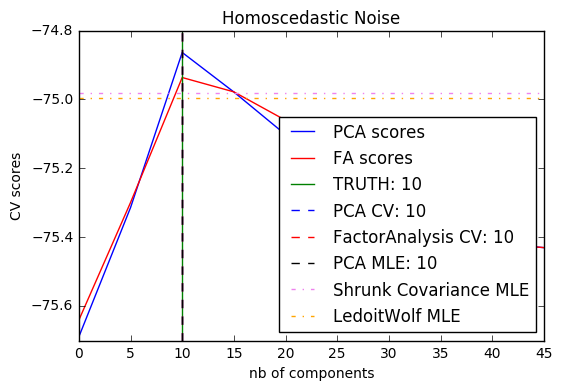

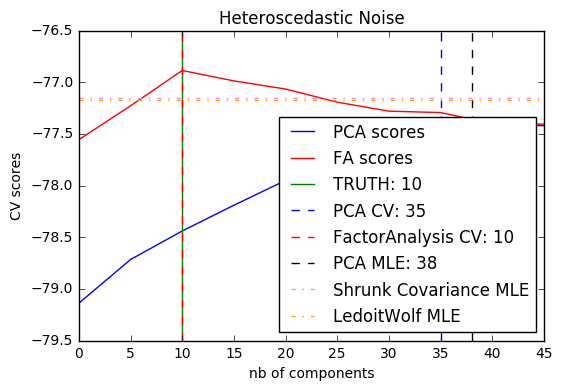

In [2]:
# #############################################################################
# Create the data

n_samples, n_features, rank = 1000, 50, 10
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

# #############################################################################
# Fit the models

n_components = np.arange(0, n_features, 5)  # options for n_components


def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X, cv=5)))
        fa_scores.append(np.mean(cross_val_score(fa, X, cv=5)))

    return pca_scores, fa_scores


def shrunk_cov_score(X):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages}, cv=5)
    return np.mean(cross_val_score(cv.fit(X).best_estimator_, X, cv=5))


def lw_score(X):
    return np.mean(cross_val_score(LedoitWolf(), X, cv=5))


for X, title in [(X_homo, 'Homoscedastic Noise'),
                 (X_hetero, 'Heteroscedastic Noise')]:
    pca_scores, fa_scores = compute_scores(X)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]

    pca = PCA(svd_solver='full', n_components='mle')
    pca.fit(X)
    n_components_pca_mle = pca.n_components_

    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure()
    plt.plot(n_components, pca_scores, 'b', label='PCA scores')
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
    plt.axvline(n_components_pca, color='b',
                label='PCA CV: %d' % n_components_pca, linestyle='--')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
    plt.axvline(n_components_pca_mle, color='k',
                label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

    # compare with other covariance estimators
    plt.axhline(shrunk_cov_score(X), color='violet',
                label='Shrunk Covariance MLE', linestyle='-.')
    plt.axhline(lw_score(X), color='orange',
                label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape
(1797, 7)


(1797, 7)

In [5]:
def fit(self, X, feature_labels=None, estimator_params=None):
        """Fits an Sklearn FA model to X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        feature_labels : array-like, shape (n_features), optional
                         Labels for each of the features in X.

        estimator_params : dict, optional
                           The parameters to pass to Sklearn's FA estimators.


        Returns
        -------
        self
        """
        self._reset()
        if feature_labels is None:
            feature_labels = ["feature_{}".format(i) for i in range(X.shape[1])]   # feature labels being the muscles in this case? sorted_keys
        self.feature_labels_ = feature_labels
        self.model_ = SklearnFactorAnalysis()
        if estimator_params is not None:
            # Update Sklearn estimator params
            assert isinstance(estimator_params, dict)   ##make estimator params muscles dict?
            self.model_.set_params(**estimator_params)
        self.model_.fit(X)

        # Remove zero-valued components (n_components x n_features)
        components_mask = np.sum(self.model_.components_ != 0.0, axis=1) > 0.0
        self.components_ = self.model_.components_[components_mask]

        # Compute the % variance explained (with/without noise)
        c2 = np.sum(self.components_ ** 2, axis=1)
        self.total_variance_ = np.sum(c2)
        self.pvars_ = 100 * c2 / self.total_variance_
        self.pvars_noise_ = 100 * c2 / (self.total_variance_ +
                                        np.sum(self.model_.noise_variance_))
        return self 

In [14]:
fit(self, multi_fly_df, sorted_keys)

NameError: name 'self' is not defined

In [16]:
def FA_results(data, n_comps=None):
    fa = FA(n_components=n_coms)
    model = fa.fit(data)
    out_data = {'model' : model, 'reconstruction error': fa.reconstruction_err_ }
    return 'FA', out_data 

In [17]:
FA_results(multi_fly_df)

NameError: global name 'FA' is not defined

In [18]:
def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores 

In [28]:
select_df= pd.DataFrame()
select_df['left_amp'] = multi_fly_df['left_amp']
#select_df['right_amp'] = multi_fly_df['right_amp']
select_df['i1_left'] = multi_fly_df['i1_left']
#select_df['i1_right'] = multi_fly_df['i1_right']

In [30]:
#compute_scores(select_df)

In [8]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
#df_features = pd.read_csv('tests/data/test02.csv')
fa = FactorAnalyzer(rotation=None)
fa.fit(multi_fly_df)

SyntaxError: Non-ASCII character '\xcb' in file /usr/local/lib/python2.7/dist-packages/factor_analyzer/confirmatory_factor_analyzer.py on line 838, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details (confirmatory_factor_analyzer.py, line 838)

In [ ]:
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=3, rotation=None, rotation_kwargs={},
use_smc=True)
>>> fa.loadings_
array([[-0.12991218, 0.16398154, 0.73823498],
[ 0.03899558, 0.04658425, 0.01150343],
[ 0.34874135, 0.61452341, -0.07255667],
[ 0.45318006, 0.71926681, -0.07546472],
[ 0.36688794, 0.44377343, -0.01737067],
[ 0.74141382, -0.15008235, 0.29977512],
[ 0.741675 , -0.16123009, -0.20744495],
[ 0.82910167, -0.20519428, 0.04930817],
[ 0.76041819, -0.23768727, -0.1206858 ],
[ 0.81533404, -0.12494695, 0.17639683]])
>>> fa.get_communalities()
array([0.588758 , 0.00382308, 0.50452402, 0.72841183, 0.33184336,
0.66208428, 0.61911036, 0.73194557, 0.64929612, 0.71149718])

In [9]:
###explanatory/ exploratory factor analysis

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

In [10]:
iris = datasets.load_iris()

In [11]:
type(iris)

sklearn.utils.Bunch

In [12]:
X = iris.data

In [13]:
type(X)
np.shape(X)

(150, 4)

In [14]:
#X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [15]:
variable_names = iris.feature_names

In [16]:
variable_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
X[0:10,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [49]:
factor = FactorAnalysis().fit(X)

In [50]:
pd.DataFrame(factor.components_,columns = variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


In [22]:
###explanatory/ exploratory factor analysis

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

In [25]:
WSA_increase 
WSA_left_turn 
WSA_right_turn
WSA_decrease

WSA_decrease.columns.values

array(['t', 'stimulus', 'amp_diff', 'left_amp', 'right_amp', 'fly_num',
       'wbf', 'experimental_condition', 'pr_left', 'tpd_left', 'nm_left',
       'iii1_left', 'iii3_left', 'i2_left', 'hg2_left', 'hg3_left',
       'hg1_left', 'i1_left', 'bkg_left', 'b1_left', 'b2_left', 'b3_left',
       'iii24_left', 'hg4_left', 'pr_right', 'tpd_right', 'nm_right',
       'iii1_right', 'iii3_right', 'i2_right', 'hg2_right', 'hg3_right',
       'hg1_right', 'i1_right', 'bkg_right', 'b1_right', 'b2_right',
       'b3_right', 'iii24_right', 'hg4_right'], dtype=object)

In [54]:
WSA_increase = multi_fly_df.loc[(multi_fly_df['left_amp'] >= mean_left_amp*1.1) & (multi_fly_df['right_amp'] >= mean_right_amp*1.1)]

WSA_left_turn = multi_fly_df.loc[(multi_fly_df['left_amp'] >= mean_left_amp*1.12) & (multi_fly_df['right_amp'] <= mean_right_amp*.89)]

WSA_right_turn = multi_fly_df.loc[(multi_fly_df['left_amp'] <= mean_left_amp*.95) & (multi_fly_df['right_amp'] >= mean_right_amp*1.25)]

WSA_decrease = multi_fly_df.loc[(multi_fly_df['left_amp'] <= mean_left_amp*.9) & (multi_fly_df['right_amp'] <= mean_right_amp*.9)]

In [38]:
cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    WSA_decrease = WSA_decrease.drop([cull[1]+'_'+cull[0]], axis=1)

WSA_decrease = WSA_decrease.drop(['t'], axis = 1)
WSA_decrease = WSA_decrease.drop(['stimulus'], axis =1)
WSA_decrease = WSA_decrease.drop(['amp_diff'], axis= 1)
WSA_decrease = WSA_decrease.drop(['left_amp'], axis = 1) 
WSA_decrease = WSA_decrease.drop(['right_amp'], axis =1) 
WSA_decrease = WSA_decrease.drop(['fly_num'], axis =1) 
WSA_decrease = WSA_decrease.drop(['wbf'], axis =1)
WSA_decrease = WSA_decrease.drop(['experimental_condition'], axis=1)

In [39]:
type(WSA_decrease)
np.shape(WSA_decrease)

(76095, 22)

In [43]:
factor_WSA_dec = FactorAnalysis().fit(WSA_decrease)

In [44]:
col_names = WSA_decrease.columns.values

In [47]:
d = pd.DataFrame(factor_WSA_dec.components_,columns = col_names)
d

,iii1_left,iii3_left,i2_left,hg2_left,hg3_left,hg1_left,i1_left,b1_left,b2_left,b3_left,...,iii3_right,i2_right,hg2_right,hg3_right,hg1_right,i1_right,b1_right,b2_right,b3_right,hg4_right
0,0.078026,0.840881,0.211404,1.274147,-0.003060,0.460235,0.180811,0.709997,0.041074,0.990957,...,0.512636,0.287101,0.512242,0.028529,1.175075,0.315560,1.096908,0.126318,1.587680,1.000008
1,0.017524,-0.109909,-0.078066,0.524773,-0.013925,-0.060222,-0.045553,-0.069358,0.038848,-0.278389,...,-0.346100,0.019748,3.234137,0.137683,0.365495,0.117202,-0.349840,-0.066004,-0.158661,0.072174
2,0.049602,0.004358,0.089345,1.273518,-0.029223,0.497092,0.078542,-0.243722,-0.009439,-0.251889,...,-0.506267,0.119768,-0.409792,-0.086180,0.372850,0.048694,-0.225011,0.020065,-0.230020,-0.557020
3,0.010864,-0.493324,0.090250,0.046868,0.004244,0.329136,0.168978,-0.014399,0.001052,0.273012,...,0.881995,-0.046210,0.226626,-0.005049,-0.112937,-0.064884,-0.006366,0.005827,-0.558522,-0.059319
4,0.032949,0.090117,-0.211167,-0.321455,-0.021821,0.069693,0.024782,-0.047413,0.035924,-0.124633,...,0.240370,-0.011041,-0.037284,0.021798,-0.200829,0.024437,0.011247,0.049013,0.246890,-0.356116
5,-0.000304,-0.121472,-0.019093,-0.365477,0.002585,0.090352,0.035773,-0.152337,-0.043675,-0.165386,...,-0.151942,0.005119,-0.001626,0.011982,0.322724,0.160565,0.024711,-0.007841,0.091589,0.003026
6,0.020477,0.104188,-0.112675,0.253590,0.033467,0.043564,0.022587,0.070698,0.007002,-0.009677,...,-0.096472,-0.153565,-0.153501,0.038885,-0.105037,0.046727,-0.059390,-0.025292,-0.076195,0.053878
7,0.019984,0.023400,0.032363,-0.077688,0.008135,-0.138088,-0.031311,0.030808,0.011223,-0.002759,...,0.126419,-0.001687,-0.029276,-0.039431,0.173767,0.042586,-0.082789,0.001351,-0.110144,0.026258
8,0.006452,-0.063814,0.027306,-0.054450,0.000368,-0.022426,0.011472,0.052503,0.006016,0.001476,...,-0.162383,0.019019,-0.024828,0.010669,-0.024836,0.003766,0.046376,0.003869,-0.085541,-0.017757
9,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000


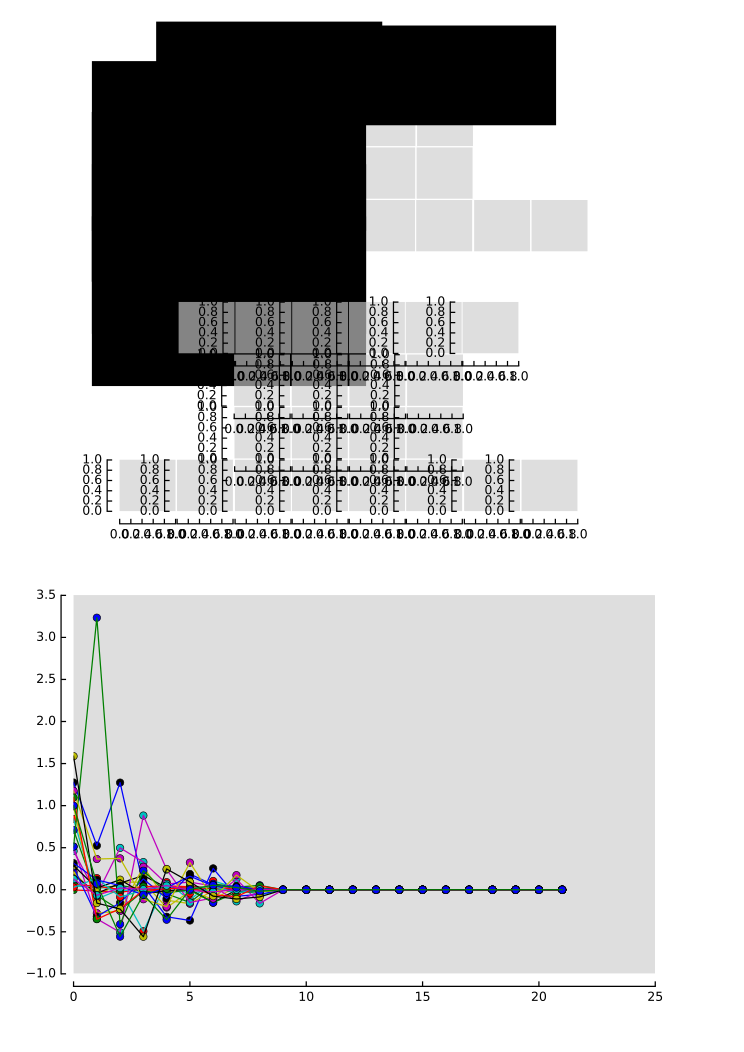

In [50]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#layout.axes['ind_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_ind_F_1[1500:1600])
#layout.axes['ind_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_ind_F_1[1500:1600])

#layout.axes['coup_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_coup_F_1[1500:1600]#)
#layout.axes['coup_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_coup_F_1[1500:1600])


for col in col_names: 
    layout.axes['heat_map'].plot(d[col], 'o')
    layout.axes['heat_map'].plot(d[col])
#norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
#fig.colorbar(c, ax=ax0)



#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
#color=cmap(norm(full_matrix_2))
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('factor_analysis_WSA_dec.svg')
plt.close('all')
display(SVG('factor_analysis_WSA_dec.svg'))

In [69]:

#from factor_analyzer import FactorAnalyzer

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v = varimax(d)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
v

array([[ -4.16333634e-17,   5.48882235e-06,   1.07552856e-16,
          1.17817206e-02,   2.77555756e-17,   1.96596477e-05,
         -6.93889390e-18,   5.55111512e-17,  -3.46944695e-18,
         -4.30211422e-16,  -5.55111512e-17,   0.00000000e+00,
         -7.10011979e-03,  -1.80162963e-05,   2.30807666e-01,
         -5.55111512e-17,  -4.04219077e-04,   3.72965547e-17,
          5.37764278e-17,   2.21177243e-17,   3.31113840e+00,
          1.09391280e-03],
       [ -3.12250226e-17,   1.08158720e-06,  -1.00245333e-15,
         -7.49718602e-03,  -3.12250226e-17,   1.02804439e-05,
          1.95156391e-17,   5.75928194e-16,  -9.46508497e-17,
          8.25294694e-16,   1.35308431e-16,   2.42861287e-17,
          6.44840478e-03,   7.73608979e-05,   3.36774520e+00,
         -6.93889390e-18,  -1.02442498e-05,   5.74627151e-18,
          5.05780313e-17,   4.20670443e-17,   2.19234362e-01,
          7.57647564e-04],
       [ -4.16333634e-17,  -9.20535348e-06,  -6.54164223e-15,
          1.7388

In [97]:
m = d #fa.components_
n = v #fa.noise_variance_

m1 = m**2

m2 = np.sum(m1,axis=1)

pvar1 = (100*m2[0])/np.sum(m2)
pvar2 = (100*m2[1])/np.sum(m2)
pvar3 = (100*m2[2])/np.sum(m2)
pvar4 = (100*m2[3])/np.sum(m2)
pvar5 = (100*m2[4])/np.sum(m2)
pvar6 = (100*m2[5])/np.sum(m2)
pvar7 = (100*m2[6])/np.sum(m2)
pvar8 = (100*m2[7])/np.sum(m2)
pvar9 = (100*m2[8])/np.sum(m2)
pvar10 = (100*m2[9])/np.sum(m2)
pvar11 = (100*m2[10])/np.sum(m2)
pvar12 = (100*m2[11])/np.sum(m2)
pvar13 = (100*m2[12])/np.sum(m2)
pvar14 = (100*m2[13])/np.sum(m2)
pvar15 = (100*m2[14])/np.sum(m2)
pvar16 = (100*m2[15])/np.sum(m2)
pvar17 = (100*m2[16])/np.sum(m2)
pvar18 = (100*m2[17])/np.sum(m2)
pvar19 = (100*m2[18])/np.sum(m2)
pvar20 = (100*m2[19])/np.sum(m2)
pvar21 = (100*m2[20])/np.sum(m2)
pvar22 = (100*m2[21])/np.sum(m2)


pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))

per_dav_df = pd.DataFrame()
per_dav_df['pvars']= [pvar1 , pvar2, pvar3, pvar4, pvar5, pvar6, pvar7, pvar8, pvar9, pvar10, pvar11, pvar12, pvar13, pvar14, pvar15, pvar16, pvar17, pvar18, pvar19, pvar20, pvar21, pvar22]

In [73]:
pvar1

38.904892306280402

In [74]:
pvar2

40.221260379600245

In [76]:
pvar3 

10.717767044412623

In [78]:
pvar4

1.7159273557250707

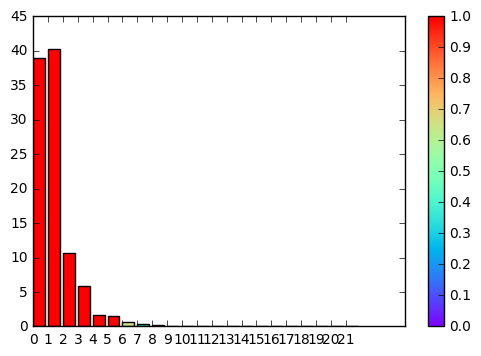

In [99]:
#Percentage of variance explained by each factor

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(per_dav_df['pvars'])#*(10^160))
c = list(per_dav_df['pvars'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap((df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [55]:
cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    WSA_increase = WSA_increase.drop([cull[1]+'_'+cull[0]], axis=1)

WSA_increase = WSA_increase.drop(['t'], axis = 1)
WSA_increase = WSA_increase.drop(['stimulus'], axis =1)
WSA_increase = WSA_increase.drop(['amp_diff'], axis= 1)
WSA_increase = WSA_increase.drop(['left_amp'], axis = 1) 
WSA_increase = WSA_increase.drop(['right_amp'], axis =1) 
WSA_increase = WSA_increase.drop(['fly_num'], axis =1) 
WSA_increase = WSA_increase.drop(['wbf'], axis =1)
WSA_increase = WSA_increase.drop(['experimental_condition'], axis=1)


type(WSA_increase)
np.shape(WSA_increase)


factor_WSA_inc = FactorAnalysis().fit(WSA_increase)

In [56]:
col_names = WSA_increase.columns.values

In [57]:
d2 = pd.DataFrame(factor_WSA_inc.components_,columns = col_names)
d2

,iii1_left,iii3_left,i2_left,hg2_left,hg3_left,hg1_left,i1_left,b1_left,b2_left,b3_left,...,iii3_right,i2_right,hg2_right,hg3_right,hg1_right,i1_right,b1_right,b2_right,b3_right,hg4_right
0,0.152518,1.514638,0.216902,3.629896,-0.042767,1.020552,0.383774,1.015349,0.074374,1.429235,...,1.324692,0.168815,1.524719,0.018868,1.281654,0.394878,1.206236,0.129521,1.807373,0.710173
1,0.015229,-0.200397,-0.043394,-0.615926,-0.010626,-0.190759,0.013830,-0.128969,-0.033702,-0.092734,...,0.451836,0.013092,2.941240,0.018182,0.157694,0.056840,-0.437551,-0.016653,0.022660,-0.513325
2,0.023768,-0.131989,0.018228,0.751776,-0.020437,0.358913,0.074773,-0.104130,-0.029665,-0.095740,...,-0.723206,0.054385,-0.055256,-0.059174,0.176058,0.009250,-0.223949,0.001937,-0.462339,-0.578888
3,-0.009069,-0.125892,0.209068,-0.100975,-0.006213,0.018919,-0.030945,-0.096216,0.037240,-0.295638,...,-0.315738,0.185275,0.137513,0.015049,0.660108,0.112484,0.050826,0.027012,-0.084378,0.565893
4,-0.001087,-0.456577,0.143599,-0.124004,0.009580,0.202846,0.088762,-0.031644,0.009636,0.118021,...,0.528417,-0.015624,-0.108861,-0.010255,-0.067367,-0.022456,0.005522,0.027782,-0.290222,-0.084936
5,0.021054,0.015277,-0.097880,-0.247014,0.029173,-0.047877,0.022928,0.005184,0.020906,-0.044424,...,-0.214287,-0.072041,-0.175013,0.008405,0.060934,0.080729,0.000425,0.030420,0.010173,-0.117788
6,0.004834,-0.036652,0.061680,0.225163,0.034223,-0.095559,-0.049475,0.037907,0.046757,-0.013060,...,0.044087,0.002310,0.090932,0.015208,-0.116030,-0.043675,-0.042785,0.031467,-0.101328,-0.029149
7,-0.003038,-0.018364,-0.020662,0.142564,-0.001995,0.033432,0.011531,-0.033892,0.001931,-0.030471,...,0.007628,-0.027110,-0.005021,0.064447,-0.086634,0.029286,-0.033064,-0.015112,-0.036614,0.080975
8,0.004188,-0.070026,-0.013028,-0.056164,-0.007627,0.014025,0.004609,0.070638,0.011665,0.015261,...,-0.038928,-0.024663,0.027123,-0.002746,0.039833,-0.003633,0.008154,-0.015936,-0.073209,0.072113
9,0.000451,0.026427,0.016801,0.006701,0.012745,-0.029546,0.005938,0.018477,-0.007162,0.031346,...,-0.043867,0.009339,0.012753,-0.001051,-0.002820,0.003732,-0.016641,-0.008876,-0.032183,0.021741


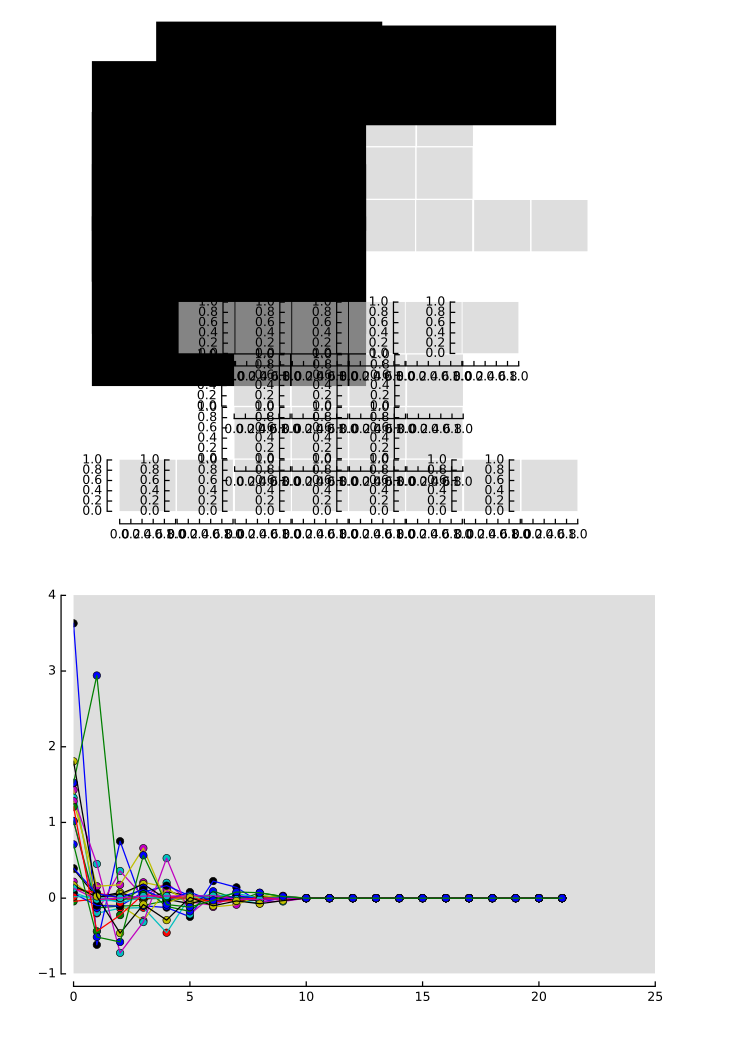

In [58]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#layout.axes['ind_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_ind_F_1[1500:1600])
#layout.axes['ind_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_ind_F_1[1500:1600])

#layout.axes['coup_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_coup_F_1[1500:1600]#)
#layout.axes['coup_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_coup_F_1[1500:1600])


for col in col_names: 
    layout.axes['heat_map'].plot(d2[col], 'o')
    layout.axes['heat_map'].plot(d2[col])
#norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
#fig.colorbar(c, ax=ax0)



#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
#color=cmap(norm(full_matrix_2))
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('factor_analysis_WSA_inc.svg')
plt.close('all')
display(SVG('factor_analysis_WSA_inc.svg'))

In [91]:

#from factor_analyzer import FactorAnalyzer

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v2 = varimax(d2)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


In [108]:
m = d2 #fa.components_
n = v2 #fa.noise_variance_

m1 = m**2

m2 = np.sum(m1,axis=1)

pvar1 = (100*m2[0])/np.sum(n)
pvar2 = (100*m2[1])/np.sum(n)
pvar3 = (100*m2[2])/np.sum(n)
pvar4 = (100*m2[3])/np.sum(n)
pvar5 = (100*m2[4])/np.sum(n)
pvar6 = (100*m2[5])/np.sum(n)
pvar7 = (100*m2[6])/np.sum(n)
pvar8 = (100*m2[7])/np.sum(n)
pvar9 = (100*m2[8])/np.sum(n)
pvar10 = (100*m2[9])/np.sum(n)
pvar11 = (100*m2[10])/np.sum(n)
pvar12 = (100*m2[11])/np.sum(n)
pvar13 = (100*m2[12])/np.sum(n)
pvar14 = (100*m2[13])/np.sum(n)
pvar15 = (100*m2[14])/np.sum(n)
pvar16 = (100*m2[15])/np.sum(n)
pvar17 = (100*m2[16])/np.sum(n)
pvar18 = (100*m2[17])/np.sum(n)
pvar19 = (100*m2[18])/np.sum(n)
pvar20 = (100*m2[19])/np.sum(n)
pvar21 = (100*m2[20])/np.sum(n)
pvar22 = (100*m2[21])/np.sum(n)


pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))

per_dav_df = pd.DataFrame()
per_dav_df['pvars']= [pvar1 , pvar2, pvar3, pvar4, pvar5, pvar6, pvar7, pvar8, pvar9, pvar10, pvar11, pvar12, pvar13, pvar14, pvar15, pvar16, pvar17, pvar18, pvar19, pvar20, pvar21, pvar22]


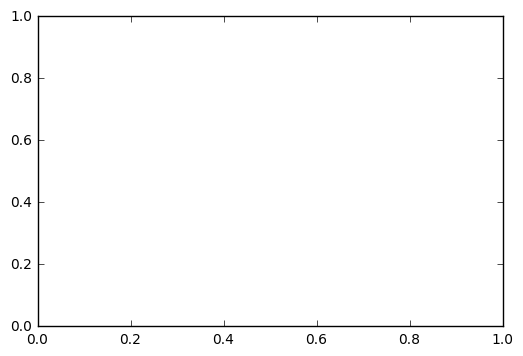

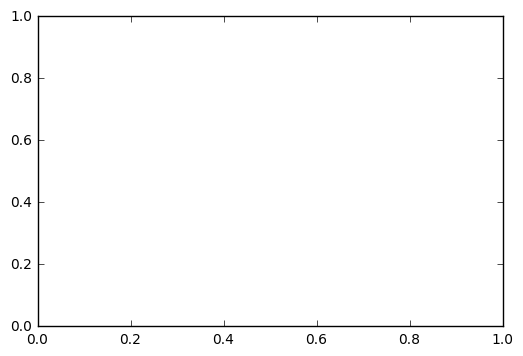

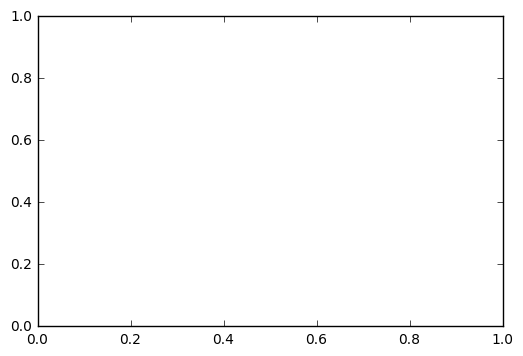

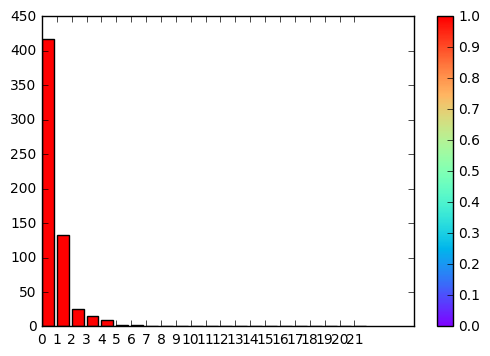

In [112]:
#Percentage of variance explained by each factor

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_
#x = list(pitch_down_nnew_df['muscles'])
x = np.arange(22)
y = list(per_dav_df['pvars'])#*(10^160))
c = list(per_dav_df['pvars'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

#print (df.y) 

cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap((df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [60]:
cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    WSA_left_turn = WSA_left_turn.drop([cull[1]+'_'+cull[0]], axis=1)

WSA_left_turn = WSA_left_turn.drop(['t'], axis = 1)
WSA_left_turn = WSA_left_turn.drop(['stimulus'], axis =1)
WSA_left_turn = WSA_left_turn.drop(['amp_diff'], axis= 1)
WSA_left_turn = WSA_left_turn.drop(['left_amp'], axis = 1) 
WSA_left_turn = WSA_left_turn.drop(['right_amp'], axis =1) 
WSA_left_turn = WSA_left_turn.drop(['fly_num'], axis =1) 
WSA_left_turn = WSA_left_turn.drop(['wbf'], axis =1)
WSA_left_turn = WSA_left_turn.drop(['experimental_condition'], axis=1)


type(WSA_left_turn)
np.shape(WSA_left_turn)


factor_WSA_LT = FactorAnalysis().fit(WSA_left_turn)

In [61]:
col_names = WSA_left_turn.columns.values

d3 = pd.DataFrame(factor_WSA_LT.components_,columns = col_names)
d3

,iii1_left,iii3_left,i2_left,hg2_left,hg3_left,hg1_left,i1_left,b1_left,b2_left,b3_left,...,iii3_right,i2_right,hg2_right,hg3_right,hg1_right,i1_right,b1_right,b2_right,b3_right,hg4_right
0,0.117879,0.762975,0.090232,1.985859,-0.012823,0.522560,0.176066,0.596468,0.065595,0.651695,...,0.038448,0.074414,3.020646,0.167312,2.054774,0.619885,0.648304,0.042798,1.193562,0.540832
1,0.023435,0.395390,0.170798,0.802744,0.007615,0.352385,0.101809,0.373490,0.020196,0.571016,...,0.280294,0.050507,-3.245712,-0.196966,0.015667,0.079059,0.735094,0.059386,0.539991,0.354437
2,0.030620,0.133636,-0.017986,0.369376,-0.009718,0.073294,-0.016715,-0.236491,0.019514,-0.483961,...,-1.352934,0.057101,-0.535872,-0.044495,0.985408,0.271141,-0.263103,0.015311,-0.271008,-0.513598
3,0.028998,-0.076190,0.030402,0.828666,-0.005091,0.255044,0.047699,-0.105868,-0.024455,0.063966,...,0.416971,0.119341,0.121701,-0.112306,-0.490749,-0.279464,-0.240994,0.043081,-0.361737,-0.580015
4,0.034002,0.129015,-0.202107,-0.473685,0.017512,-0.166287,0.020833,0.116868,0.003542,0.081374,...,0.029158,0.151569,0.005448,-0.142790,-0.048833,0.016127,0.079721,0.066103,0.056632,-0.493901
5,-0.000946,-0.144001,0.069367,-0.129599,-0.005239,0.030478,0.026742,-0.103432,-0.025879,-0.092495,...,0.257453,0.100006,-0.025551,-0.076474,0.227276,0.215605,-0.039214,0.002601,-0.131852,-0.024033
6,0.016620,-0.040663,-0.091058,0.000252,0.040298,0.029862,0.041910,0.070921,-0.018082,0.120004,...,-0.214270,-0.117875,-0.013491,0.001586,-0.085766,0.038065,-0.083200,-0.052317,-0.166046,0.057768
7,-0.003839,0.081598,0.006159,0.164693,0.004452,-0.018832,-0.014958,-0.008348,0.000262,-0.093621,...,-0.162714,0.075037,-0.015173,0.114736,-0.373885,0.088452,0.011971,-0.011289,0.069956,-0.110778
8,0.003378,-0.053609,-0.082587,-0.067398,-0.013662,0.057208,0.025291,-0.057572,0.031021,-0.078383,...,0.143589,-0.074070,-0.062446,0.060911,-0.027370,0.055345,0.022568,-0.011461,0.071829,-0.102574
9,0.005019,-0.030581,0.037091,0.006332,0.014965,-0.011393,-0.001952,0.004637,0.037867,-0.031645,...,0.019342,-0.000874,0.004686,0.015270,-0.004598,-0.005615,-0.001060,0.020260,-0.054758,0.046333


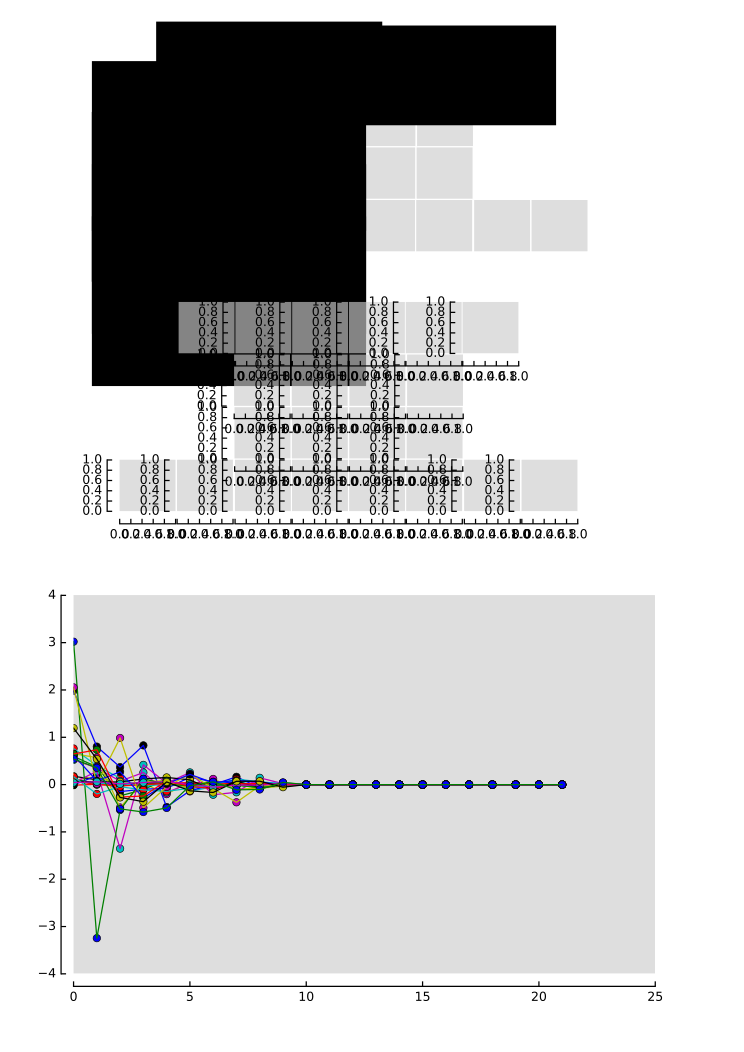

In [62]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#layout.axes['ind_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_ind_F_1[1500:1600])
#layout.axes['ind_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_ind_F_1[1500:1600])

#layout.axes['coup_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_coup_F_1[1500:1600]#)
#layout.axes['coup_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_coup_F_1[1500:1600])


for col in col_names: 
    layout.axes['heat_map'].plot(d3[col], 'o')
    layout.axes['heat_map'].plot(d3[col])
#norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
#fig.colorbar(c, ax=ax0)



#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
#color=cmap(norm(full_matrix_2))
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('factor_analysis_WSA_LT.svg')
plt.close('all')
display(SVG('factor_analysis_WSA_LT.svg'))

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


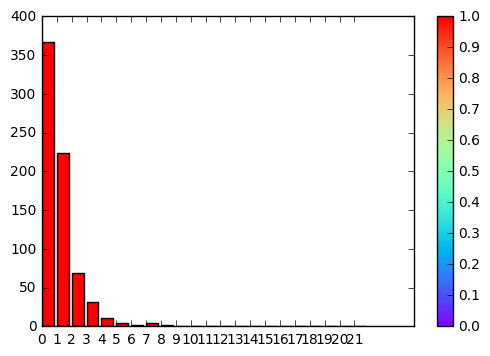

In [113]:

#from factor_analyzer import FactorAnalyzer

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v3 = varimax(d3)

m = d3 #fa.components_
n = v3 #fa.noise_variance_

m1 = m**2

m2 = np.sum(m1,axis=1)

pvar1 = (100*m2[0])/np.sum(n)
pvar2 = (100*m2[1])/np.sum(n)
pvar3 = (100*m2[2])/np.sum(n)
pvar4 = (100*m2[3])/np.sum(n)
pvar5 = (100*m2[4])/np.sum(n)
pvar6 = (100*m2[5])/np.sum(n)
pvar7 = (100*m2[6])/np.sum(n)
pvar8 = (100*m2[7])/np.sum(n)
pvar9 = (100*m2[8])/np.sum(n)
pvar10 = (100*m2[9])/np.sum(n)
pvar11 = (100*m2[10])/np.sum(n)
pvar12 = (100*m2[11])/np.sum(n)
pvar13 = (100*m2[12])/np.sum(n)
pvar14 = (100*m2[13])/np.sum(n)
pvar15 = (100*m2[14])/np.sum(n)
pvar16 = (100*m2[15])/np.sum(n)
pvar17 = (100*m2[16])/np.sum(n)
pvar18 = (100*m2[17])/np.sum(n)
pvar19 = (100*m2[18])/np.sum(n)
pvar20 = (100*m2[19])/np.sum(n)
pvar21 = (100*m2[20])/np.sum(n)
pvar22 = (100*m2[21])/np.sum(n)


pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))

per_dav_df = pd.DataFrame()
per_dav_df['pvars']= [pvar1 , pvar2, pvar3, pvar4, pvar5, pvar6, pvar7, pvar8, pvar9, pvar10, pvar11, pvar12, pvar13, pvar14, pvar15, pvar16, pvar17, pvar18, pvar19, pvar20, pvar21, pvar22]


#Percentage of variance explained by each factor

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(per_dav_df['pvars'])#*(10^160))
c = list(per_dav_df['pvars'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap((df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [122]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
#import seaborn as sb
%matplotlib inline

covar_matrix = PCA(n_components = 22) #we have 20 features
covar_matrix.fit(d2)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 69.2,  91.2,  95.4,  98.1,  99.5,  99.8,  99.9,  99.9,  99.9,
        99.9,  99.9,  99.9,  99.9,  99.9,  99.9,  99.9,  99.9,  99.9,
        99.9,  99.9,  99.9,  99.9])

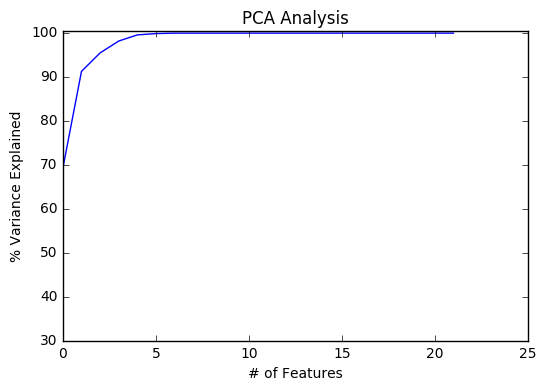

In [123]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [63]:
cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    WSA_right_turn = WSA_right_turn.drop([cull[1]+'_'+cull[0]], axis=1)

WSA_right_turn = WSA_right_turn.drop(['t'], axis = 1)
WSA_right_turn = WSA_right_turn.drop(['stimulus'], axis =1)
WSA_right_turn = WSA_right_turn.drop(['amp_diff'], axis= 1)
WSA_right_turn = WSA_right_turn.drop(['left_amp'], axis = 1) 
WSA_right_turn = WSA_right_turn.drop(['right_amp'], axis =1) 
WSA_right_turn = WSA_right_turn.drop(['fly_num'], axis =1) 
WSA_right_turn = WSA_right_turn.drop(['wbf'], axis =1)
WSA_right_turn = WSA_right_turn.drop(['experimental_condition'], axis=1)


type(WSA_right_turn)
np.shape(WSA_right_turn)


factor_WSA_RT = FactorAnalysis().fit(WSA_right_turn)

In [64]:
col_names = WSA_right_turn.columns.values

d4 = pd.DataFrame(factor_WSA_RT.components_,columns = col_names)
d4

,iii1_left,iii3_left,i2_left,hg2_left,hg3_left,hg1_left,i1_left,b1_left,b2_left,b3_left,...,iii3_right,i2_right,hg2_right,hg3_right,hg1_right,i1_right,b1_right,b2_right,b3_right,hg4_right
0,0.120766,0.639714,0.233301,3.563659,-0.015214,2.287452,0.793934,0.638095,-0.001519,1.001961,...,1.303113,0.180804,3.689795,0.012851,0.895963,0.217711,0.460869,0.099399,0.894866,-0.196925
1,-0.005209,0.404912,-0.111102,-1.606145,-0.014387,-1.051027,-0.247738,-0.038456,0.017388,-0.201046,...,0.360469,0.013338,2.161941,0.079533,-0.023363,0.050732,-0.174850,-0.026756,0.376438,0.211632
2,0.038043,0.621882,0.074865,-0.700168,-0.017951,-0.395726,-0.046351,0.410518,0.025275,0.453553,...,0.443369,0.035767,-0.862246,-0.049928,0.266506,0.020995,0.454901,0.016481,0.788452,0.368304
3,-0.004903,0.575252,0.019581,0.720541,0.007472,-0.413296,-0.269156,-0.041650,-0.011628,0.036695,...,-0.360469,0.116004,0.056381,-0.010842,0.159253,-0.013194,-0.109710,-0.054874,0.241956,-0.083208
4,0.024545,0.176622,-0.126414,-0.097516,0.013383,0.017727,-0.013469,0.082124,-0.023287,0.170544,...,0.133900,-0.161214,-0.072912,-0.039337,-0.372269,-0.050460,-0.117828,-0.057821,0.039337,-0.627264
5,-0.017708,-0.124449,-0.092900,0.380382,0.006672,-0.167665,-0.125979,0.043253,0.057024,-0.074680,...,0.266705,-0.115466,-0.169000,0.071938,-0.258821,0.047424,0.075039,0.044526,0.168712,-0.010368
6,-0.005252,0.243379,-0.189908,-0.013268,0.012274,0.055602,-0.003281,-0.027416,-0.050943,-0.032403,...,-0.289239,-0.023952,-0.040973,0.010924,-0.039296,0.048528,0.090056,0.002351,0.039334,0.031951
7,-0.010623,-0.115456,-0.022538,0.000834,0.018977,-0.063680,-0.090775,-0.006283,-0.002136,0.066368,...,0.123182,0.051646,0.070530,-0.030534,0.066257,-0.013309,0.022272,0.053725,-0.029319,-0.174488
8,-0.000366,-0.036484,-0.027719,0.011170,0.016122,0.017500,-0.006443,0.069784,0.009225,0.034399,...,-0.037382,-0.018658,0.088618,0.007785,0.006261,-0.020151,0.031231,-0.030791,-0.061889,0.123222
9,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000


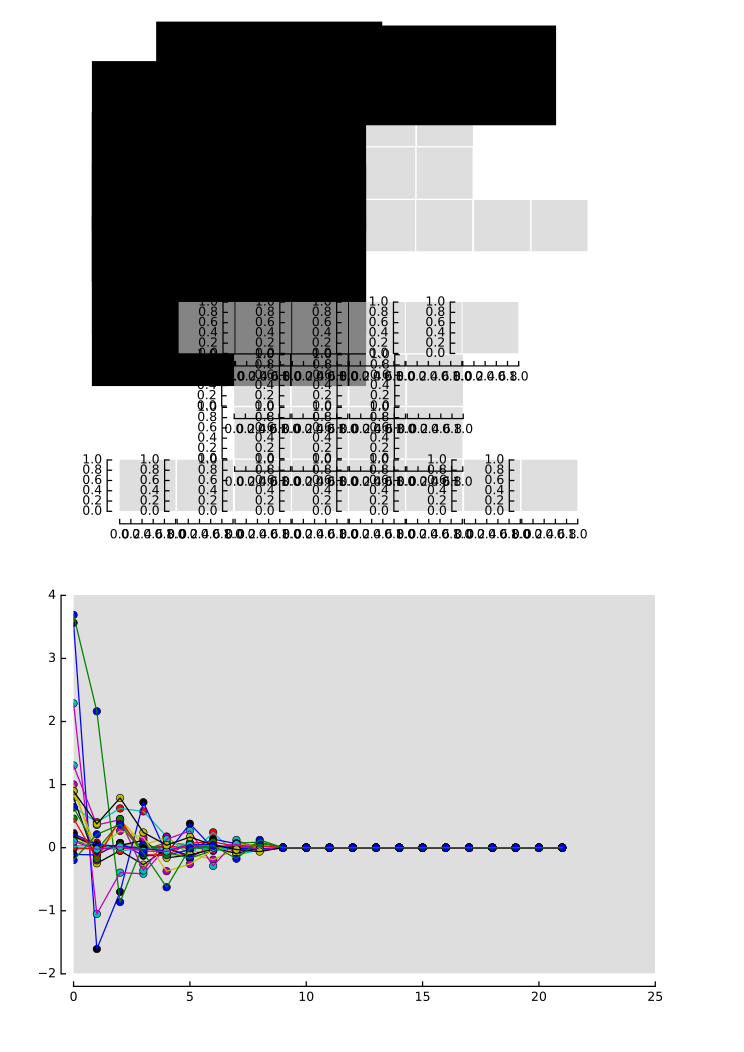

In [65]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#layout.axes['ind_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_ind_F_1[1500:1600])
#layout.axes['ind_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_ind_F_1[1500:1600])

#layout.axes['coup_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_coup_F_1[1500:1600]#)
#layout.axes['coup_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_coup_F_1[1500:1600])


for col in col_names: 
    layout.axes['heat_map'].plot(d4[col], 'o')
    layout.axes['heat_map'].plot(d4[col])
#norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
#fig.colorbar(c, ax=ax0)



#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
#color=cmap(norm(full_matrix_2))
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('factor_analysis_WSA_RT.svg')
plt.close('all')
display(SVG('factor_analysis_WSA_RT.svg'))

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


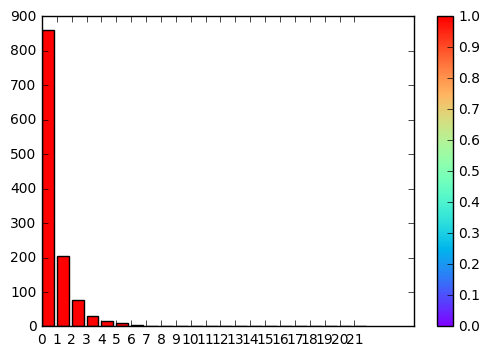

In [114]:

#from factor_analyzer import FactorAnalyzer

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v4 = varimax(d4)

m = d4 #fa.components_
n = v4 #fa.noise_variance_

m1 = m**2

m2 = np.sum(m1,axis=1)

pvar1 = (100*m2[0])/np.sum(n)
pvar2 = (100*m2[1])/np.sum(n)
pvar3 = (100*m2[2])/np.sum(n)
pvar4 = (100*m2[3])/np.sum(n)
pvar5 = (100*m2[4])/np.sum(n)
pvar6 = (100*m2[5])/np.sum(n)
pvar7 = (100*m2[6])/np.sum(n)
pvar8 = (100*m2[7])/np.sum(n)
pvar9 = (100*m2[8])/np.sum(n)
pvar10 = (100*m2[9])/np.sum(n)
pvar11 = (100*m2[10])/np.sum(n)
pvar12 = (100*m2[11])/np.sum(n)
pvar13 = (100*m2[12])/np.sum(n)
pvar14 = (100*m2[13])/np.sum(n)
pvar15 = (100*m2[14])/np.sum(n)
pvar16 = (100*m2[15])/np.sum(n)
pvar17 = (100*m2[16])/np.sum(n)
pvar18 = (100*m2[17])/np.sum(n)
pvar19 = (100*m2[18])/np.sum(n)
pvar20 = (100*m2[19])/np.sum(n)
pvar21 = (100*m2[20])/np.sum(n)
pvar22 = (100*m2[21])/np.sum(n)


pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))

per_dav_df = pd.DataFrame()
per_dav_df['pvars']= [pvar1 , pvar2, pvar3, pvar4, pvar5, pvar6, pvar7, pvar8, pvar9, pvar10, pvar11, pvar12, pvar13, pvar14, pvar15, pvar16, pvar17, pvar18, pvar19, pvar20, pvar21, pvar22]


#Percentage of variance explained by each factor

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(per_dav_df['pvars'])#*(10^160))
c = list(per_dav_df['pvars'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap((df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [52]:
df= multi_fly_df

In [90]:
df2 = df.drop("stimulus", axis =1)

In [91]:
df2= df2.fillna(0)

In [92]:
df2.head()

,t,amp_diff,left_amp,right_amp,fly_num,pr_left,tpd_left,nm_left,iii1_left,iii3_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.000000,0.064718,0.833755,0.769036,1566,6.299192,3.226293,5.059794,1.580984,4.283335,...,43.116466,0.0,16.126152,5.399027,66.165858,4.742128,0.0,8.497743,0.0,0.0
1,0.020001,0.057528,0.812182,0.754655,1566,6.314489,3.163661,4.992067,1.582485,4.305003,...,42.735292,0.0,16.036640,5.362801,65.913565,4.698902,0.0,8.374626,0.0,0.0
2,0.040003,0.057528,0.812182,0.754655,1566,6.283447,3.099517,4.851117,1.559948,4.337361,...,42.563749,0.0,15.748897,5.349068,65.865156,4.647258,0.0,8.390783,0.0,0.0
3,0.060004,0.035955,0.812182,0.776227,1566,6.527864,3.201599,4.969761,1.614941,4.368170,...,44.008076,0.0,16.411785,5.464232,67.041123,4.732150,0.0,8.543155,0.0,0.0
4,0.080005,0.014382,0.840946,0.826564,1566,6.258851,3.158297,4.869644,1.573792,4.433260,...,41.923999,0.0,15.578060,5.282962,65.719464,4.663043,0.0,8.416659,0.0,0.0


In [60]:
#muscle_activities_into_large_array = multi_fly_df.as_matrix

In [63]:
#np.shape(muscle_activities_into_large_array)

()

In [93]:
np.shape(df2.values)

(130150, 37)

In [94]:
array_of_muscle_activities = df2.values

In [95]:
col_names = df2.columns

In [96]:
factor = FactorAnalysis().fit(array_of_muscle_activities)

In [97]:
pd.DataFrame(factor.components_,columns = col_names)

,t,amp_diff,left_amp,right_amp,fly_num,pr_left,tpd_left,nm_left,iii1_left,iii3_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,242.466631,0.009510,0.030526,0.022612,0.001559,-0.152983,-0.169958,0.152737,-0.023014,0.426731,...,-2.859265,-0.058727,-0.799699,-0.129126,-0.621650,0.184672,-0.008292,-0.102663,-0.037065,0.033440
1,0.284951,0.057085,0.062008,0.006586,-0.114426,1.453513,-0.024455,-0.317675,0.154908,0.908034,...,9.019936,0.454531,0.844420,0.783613,13.173506,-0.078900,-0.101234,-0.044219,-0.033189,-0.209987
2,-0.083275,-0.135508,-0.027296,0.105692,0.761245,-0.952730,-0.360371,-1.204470,-0.251378,0.000106,...,-6.118208,0.105456,-5.709835,-1.144627,-3.063055,-0.256443,0.165938,-0.712390,0.026157,0.115484
3,0.042271,0.047123,0.030403,-0.018027,0.418736,-0.354692,-0.421754,-0.913118,0.114013,0.800474,...,3.848132,0.177740,2.956568,0.398759,-3.363612,-0.133806,0.076180,-0.139053,-0.046938,0.165330
4,0.027405,0.041976,0.012752,-0.028731,0.189339,0.278820,-0.084328,-0.807660,0.055685,0.311570,...,-0.557283,0.274090,-0.238717,0.024816,0.820160,-0.304486,0.023526,-0.280752,0.008705,0.128745
5,0.012523,-0.137960,-0.073535,0.063925,0.217528,-0.437880,-0.132198,-0.062334,-0.074497,-0.720814,...,1.964039,-0.244576,-1.486733,-0.627871,0.027583,-0.130764,0.067452,-0.346459,0.009982,-0.115136
6,-0.007984,-0.049461,-0.039503,0.009162,0.101422,-0.092438,-0.415046,0.398403,0.029388,0.254913,...,-0.878645,0.137183,0.545380,0.334124,-0.712116,0.039437,0.034696,-0.024527,0.003253,0.016759
7,-0.020336,0.046075,0.037197,-0.007036,0.033083,0.030219,-0.288018,-0.024134,0.001501,1.133699,...,0.041918,-0.037183,-0.403754,-0.005643,0.914610,0.210083,-0.069568,-0.023378,-0.039188,0.062952
8,-0.002816,-0.019387,-0.014012,0.006242,0.119917,-0.142472,0.147860,-0.128800,0.045030,-0.063904,...,-0.269856,0.102722,0.261588,0.216467,0.545833,-0.065084,0.053179,0.017912,-0.007456,0.125691
9,-0.000905,-0.008098,-0.054708,-0.050408,-0.012524,-0.138634,-0.104380,0.016826,0.114385,0.014109,...,-0.112473,-0.147613,0.065910,0.009903,0.291778,-0.198642,0.012502,-0.151076,0.071311,-0.014260


In [ ]:
#now have principle components/ eigenvectors ready
# plot them 


In [99]:
np.shape(factor.components_)
factor.components_[0]

array([  2.42466631e+02,   9.50975898e-03,   3.05263530e-02,
         2.26122968e-02,   1.55851908e-03,  -1.52982700e-01,
        -1.69957769e-01,   1.52736997e-01,  -2.30138878e-02,
         4.26730613e-01,  -2.72122445e-01,  -6.13955231e-01,
        -5.50895722e-02,   2.30962894e-01,  -3.64235048e-02,
        -2.02219398e+00,   1.97450236e-01,  -2.31998862e-02,
        -1.70849124e-02,  -9.35414211e-01,  -2.91232507e-01,
        -6.75900496e-03,  -6.83953094e-02,  -6.22789151e-02,
        -4.35269479e-02,   1.22358507e-01,  -1.18721132e-02,
        -2.85926501e+00,  -5.87274412e-02,  -7.99699257e-01,
        -1.29126176e-01,  -6.21650144e-01,   1.84671505e-01,
        -8.29190912e-03,  -1.02663235e-01,  -3.70649408e-02,
         3.34404392e-02])

In [102]:
plt.scatter(factor.components_[:, 0], factor.components_[:, 1],
            c=columns, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


NameError: name 'columns' is not defined

In [ ]:
### sort by WSA -- plot the corrrelations -- factor analysis 
### show the statistical difference


In [104]:
df2.head()

,t,amp_diff,left_amp,right_amp,fly_num,pr_left,tpd_left,nm_left,iii1_left,iii3_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.000000,0.064718,0.833755,0.769036,1566,6.299192,3.226293,5.059794,1.580984,4.283335,...,43.116466,0.0,16.126152,5.399027,66.165858,4.742128,0.0,8.497743,0.0,0.0
1,0.020001,0.057528,0.812182,0.754655,1566,6.314489,3.163661,4.992067,1.582485,4.305003,...,42.735292,0.0,16.036640,5.362801,65.913565,4.698902,0.0,8.374626,0.0,0.0
2,0.040003,0.057528,0.812182,0.754655,1566,6.283447,3.099517,4.851117,1.559948,4.337361,...,42.563749,0.0,15.748897,5.349068,65.865156,4.647258,0.0,8.390783,0.0,0.0
3,0.060004,0.035955,0.812182,0.776227,1566,6.527864,3.201599,4.969761,1.614941,4.368170,...,44.008076,0.0,16.411785,5.464232,67.041123,4.732150,0.0,8.543155,0.0,0.0
4,0.080005,0.014382,0.840946,0.826564,1566,6.258851,3.158297,4.869644,1.573792,4.433260,...,41.923999,0.0,15.578060,5.282962,65.719464,4.663043,0.0,8.416659,0.0,0.0


In [119]:
df2.loc


#measuring instead by amp_diff

WS_decrease = df2.loc[((df2['left_amp']<(1.0* np.mean(df2['left_amp']))) & df2['right_amp']< (1.0* np.mean(df2['right_amp'])))]

WS_increase = df2.loc[((df2['left_amp']>(1.0 *np.mean(df2['left_amp']))) & df2['right_amp']> (1.0 * np.mean(df2['right_amp'])))]

left_turn = df2.loc[((df2['amp_diff']>(1.25* np.mean(df2['amp_diff']))))]

right_turn = df2.loc[((df2['amp_diff']<( np.mean(df2['amp_diff']))- 0.25* np.std(df2['amp_diff'])))]



In [127]:
WS_decrease.head()

,t,amp_diff,left_amp,right_amp,fly_num,pr_left,tpd_left,nm_left,iii1_left,iii3_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
17,0.340023,0.237301,0.956001,0.718700,1566,6.076304,3.036278,4.179253,1.917073,4.878865,...,51.219257,0.0,23.273578,6.980738,67.193580,4.754017,0.0,8.795360,0.0,0.0
18,0.360024,0.251683,0.963192,0.711509,1566,6.078444,2.953899,4.104655,1.903187,4.812898,...,52.666808,0.0,23.973453,7.089410,67.181678,4.791841,0.0,8.777790,0.0,0.0
19,0.380026,0.366738,1.063865,0.697127,1566,6.230763,3.040868,4.011111,1.866145,4.577340,...,55.805090,0.0,25.272516,7.228115,67.401272,4.883620,0.0,8.713197,0.0,0.0
20,0.400027,0.366738,1.063865,0.697127,1566,6.113473,3.010910,3.905231,1.877148,4.731411,...,55.116724,0.0,25.312922,7.351477,67.320152,4.873271,0.0,8.811143,0.0,0.0
21,0.420028,0.294828,0.999146,0.704318,1566,6.045110,3.079054,3.775534,1.866890,4.683458,...,55.036015,0.0,25.215850,7.357231,67.456480,4.865295,0.0,8.837550,0.0,0.0


In [128]:
factor = FactorAnalysis().fit(WS_decrease)
df2= df2.fillna(0)
WSA_decrease_array = WS_decrease.values
col_names = df2.columns

In [129]:
factor = FactorAnalysis().fit(WSA_decrease_array)

In [130]:
pd.DataFrame(factor.components_,columns = col_names)

,t,amp_diff,left_amp,right_amp,fly_num,pr_left,tpd_left,nm_left,iii1_left,iii3_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,250.453132,-0.030984,-0.005957,0.028662,0.029597,-0.594403,-0.161450,0.278839,-0.059695,0.145975,...,-5.663051,-0.167871,-1.079531,-0.321127,-4.315451,0.189605,0.030404,-0.052176,0.000927,0.137362
1,0.953796,-0.027712,0.030213,0.063132,0.298266,0.854358,-0.252542,-0.892976,0.046532,0.737884,...,5.361439,0.579640,-1.861671,0.276559,10.773614,-0.306157,0.006244,-0.415201,0.002098,-0.179883
2,-0.221587,-0.128699,-0.017918,0.103567,0.475486,-0.966688,-0.083152,-0.473976,-0.312128,-0.124692,...,-8.206419,-0.056280,-6.293948,-1.260396,-3.366955,-0.014770,0.105486,-0.459520,0.004182,0.178137
3,-0.029520,0.003858,-0.005309,-0.007783,-0.063293,0.442466,0.027999,0.072505,-0.011461,-0.197134,...,-2.888951,0.093016,-1.718216,-0.163429,2.396376,-0.121606,-0.013575,-0.194486,0.009108,0.076859
4,0.004424,0.056162,0.023626,-0.038094,0.325097,-0.070962,-0.306036,-0.713063,0.069396,0.817710,...,0.440282,0.473272,1.324191,0.295114,-2.119681,-0.174848,0.059602,-0.161471,0.001597,0.179903
5,0.007943,-0.086800,-0.039316,0.045122,0.218172,-0.518699,-0.137196,-0.171456,-0.040369,-0.048661,...,2.204551,-0.233386,-1.660440,-0.579492,0.132084,-0.101079,0.039526,-0.326549,0.012251,0.003006
6,0.025731,0.010727,-0.001522,-0.013078,-0.060673,0.047121,0.442050,-0.286419,-0.008971,-0.828968,...,0.668492,-0.055035,-0.231971,-0.252199,-0.002020,-0.185905,0.034916,0.004821,0.004778,-0.004271
7,0.001323,-0.052191,-0.026454,0.014545,0.103032,-0.174609,-0.020984,0.088815,-0.010809,-0.611061,...,-0.080031,0.088890,0.124898,0.058674,-0.940424,-0.131669,0.074217,-0.033895,0.004098,0.008941
8,-0.004083,-0.006511,-0.005033,0.004117,0.143531,-0.132251,0.094183,-0.196451,0.077212,0.006977,...,-0.323121,0.176558,0.308438,0.255373,0.725236,-0.055624,0.058532,-0.022009,0.010846,0.084980
9,-0.001991,0.009262,-0.053267,-0.072958,-0.017548,-0.126335,-0.095178,-0.015945,0.150333,-0.007119,...,-0.153665,-0.190839,0.048015,-0.027661,0.167716,-0.223076,0.015199,-0.182519,0.054270,-0.009279


In [ ]:
#### do this for each kinematic group


dynamical analysis
system

dynamic model vs static one
